# Binary Classification on raisin dataset


In [3]:
#various imports which will be required throughout the file.

# these are basic imports which will be required for data analysis and visualization
import numpy as np
import pandas as pd
import time

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# imports for machine learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# imports for evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# imports for visualization purposes
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
# import data from a csv file
df = pd.read_csv('https://gist.githubusercontent.com/sujalcodes3/1142fee057168d222a2c3eb173bcfc0b/raw/391fdb0b5f16fe535940b793861a282f23577dd4/Raisin.csv')
print(df.shape)
df.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


<a id='basic_stats'></a>
# Basic Stats

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [6]:
# target
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [7]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#### Basic Numerical Stats

In [8]:
featuresNumData = ['Area', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']
x = df[featuresNumData]
y = df['Class']
df[featuresNumData].describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


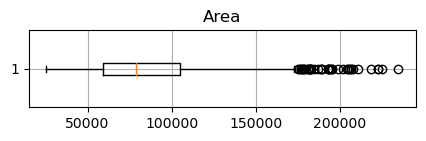

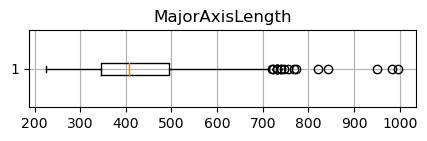

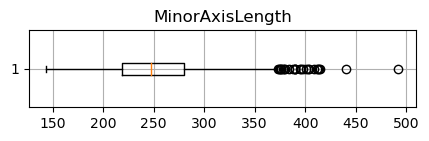

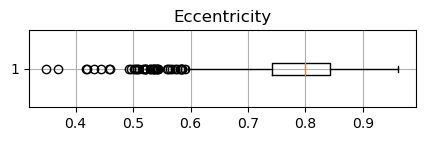

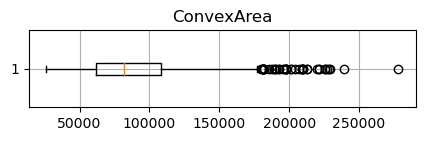

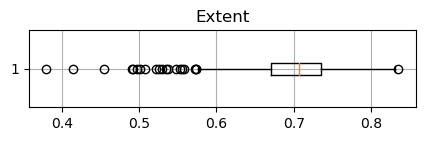

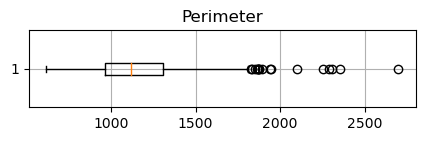

In [9]:
# boxplots of all features
for f in featuresNumData:
    plt.figure(figsize=(5,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

In [10]:
mean = df.mean()
std = df.std()

# z-score normalization 
df.mask(df.sub(df.mean()).div(df.std()).abs().gt(2))

# drop rows with NaN values
df = df.dropna()

/tmp/ipykernel_29305/156460570.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
/tmp/ipykernel_29305/156460570.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std()
/tmp/ipykernel_29305/156460570.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mask(df.sub(df.mean()

<a id='feature_corr'></a>
# Feature Correlations

<Figure size 1000x500 with 0 Axes>

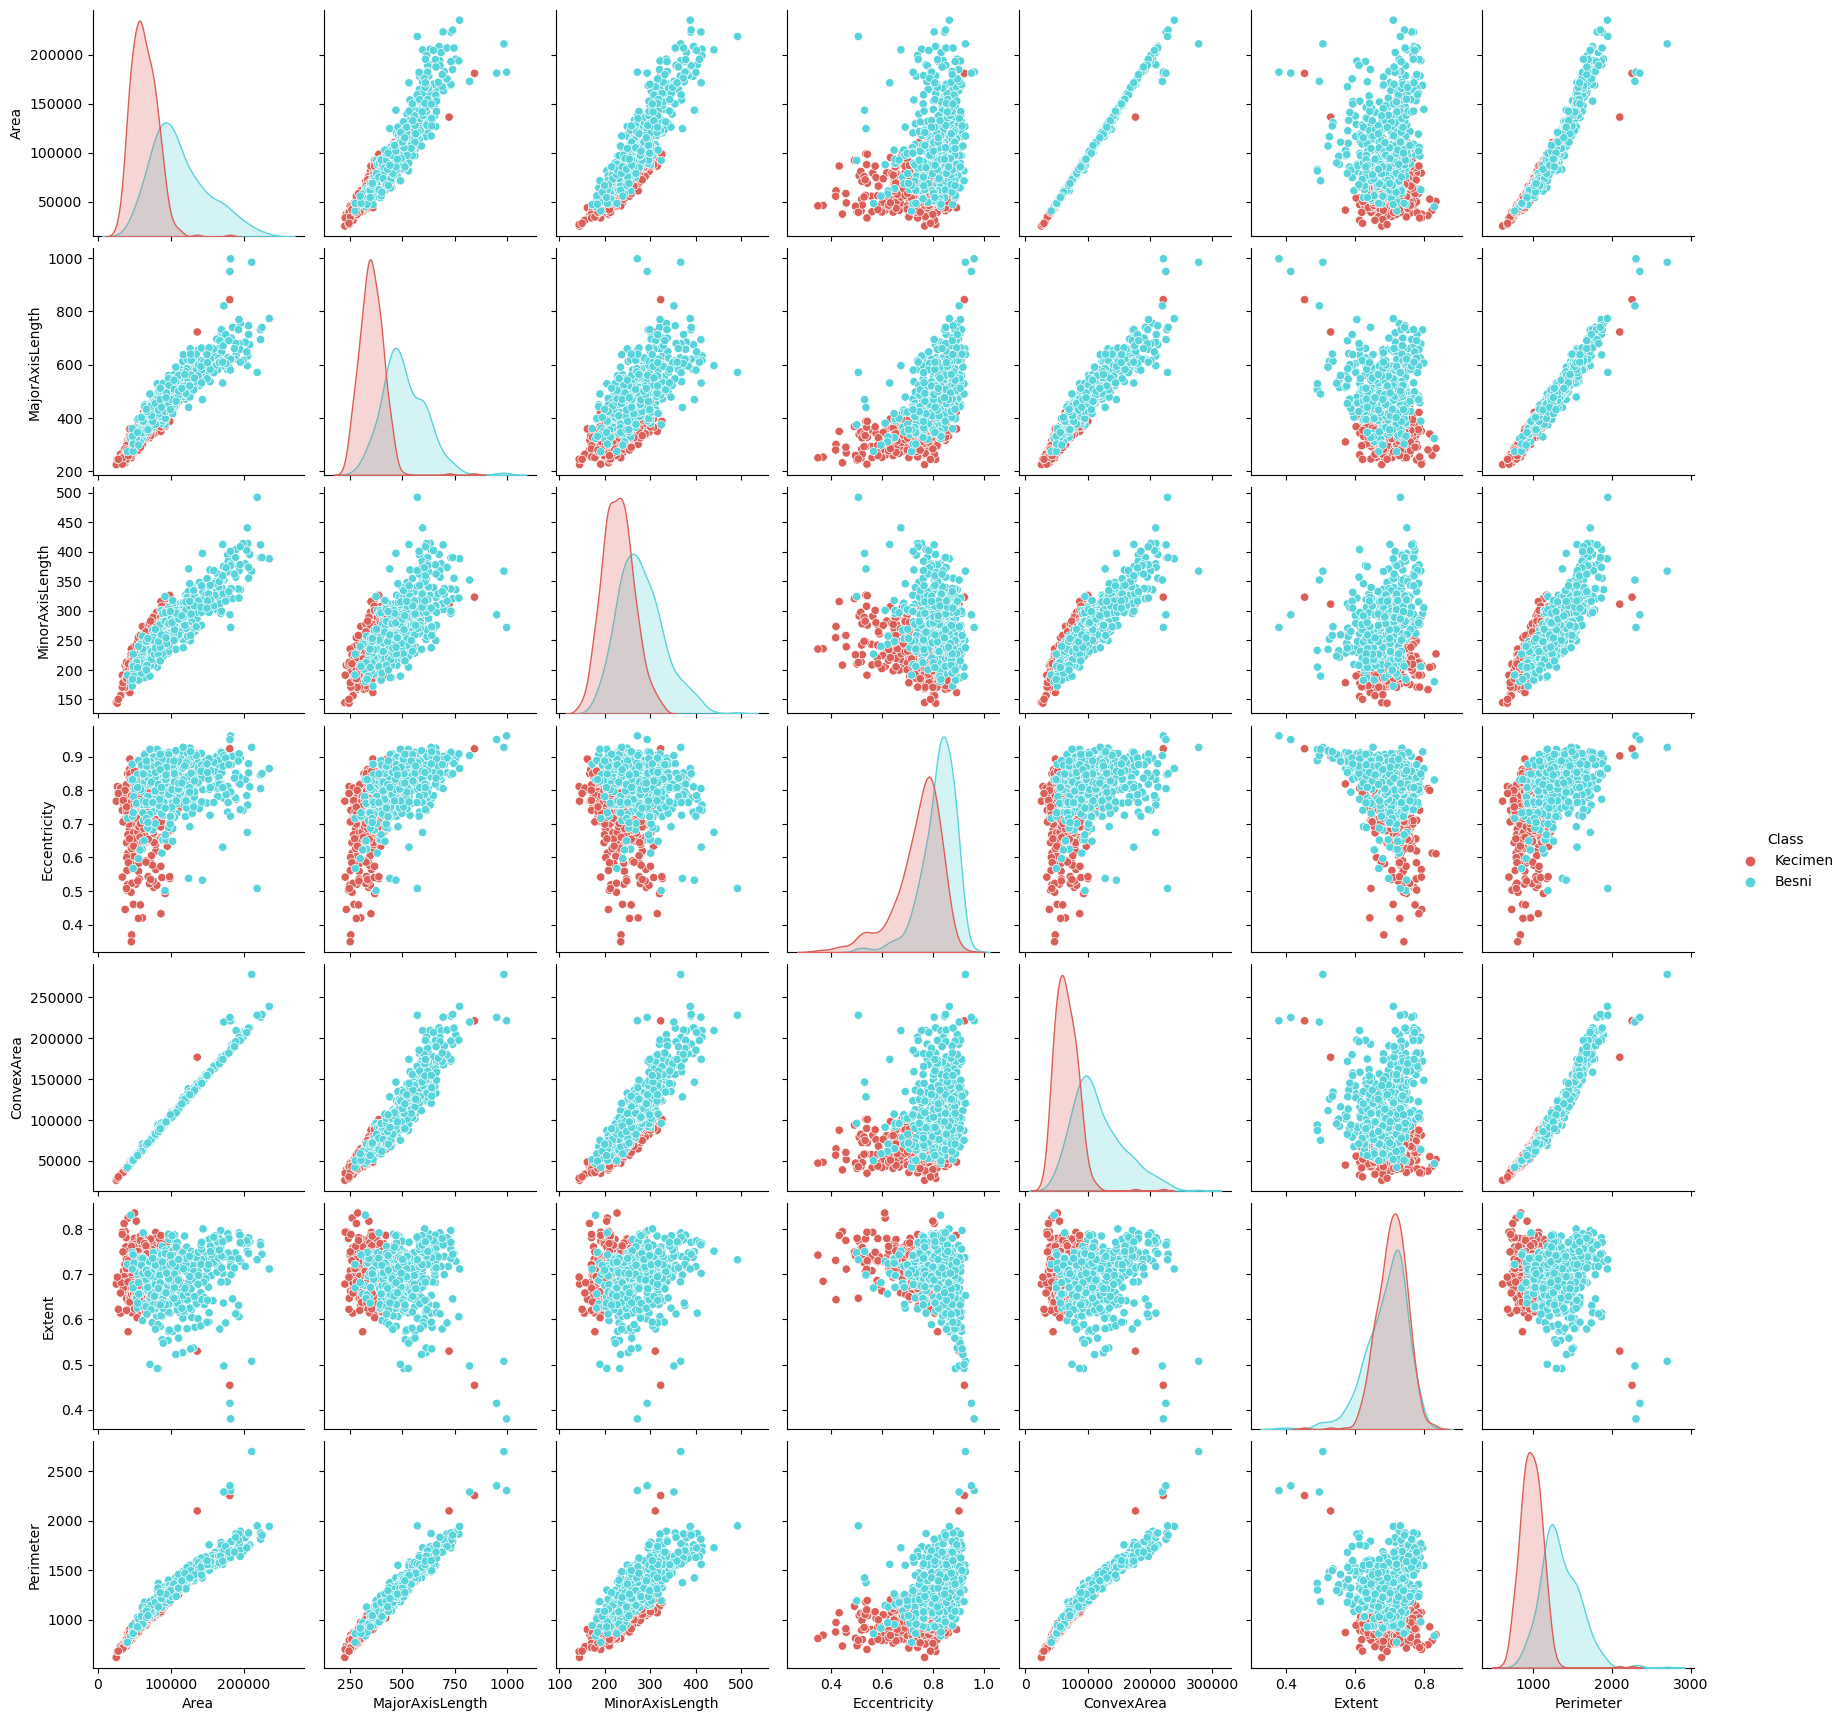

In [11]:
# plots of all features, done pair-wise for each class, class in color
plt.figure(figsize = (10,5))
sns.pairplot(df, hue="Class", diag_kind = "kde", palette="hls")
plt.show()

/tmp/ipykernel_29305/3912342926.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


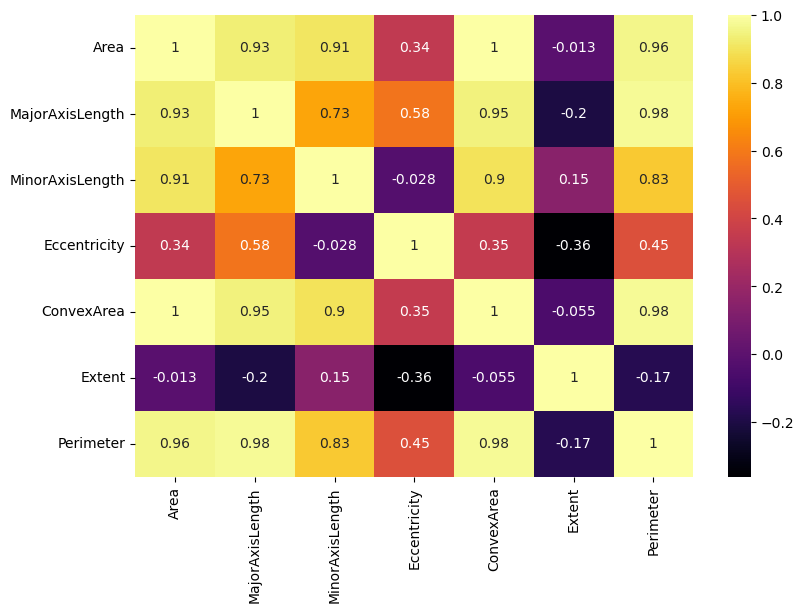

In [12]:
# we think that heatmap might be a good way to visualize the correlation between the features

cor = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data = cor, annot = True, cmap = 'inferno')
plt.show()

<a id='features_by_class'></a>
# Feature Distributions for various classes

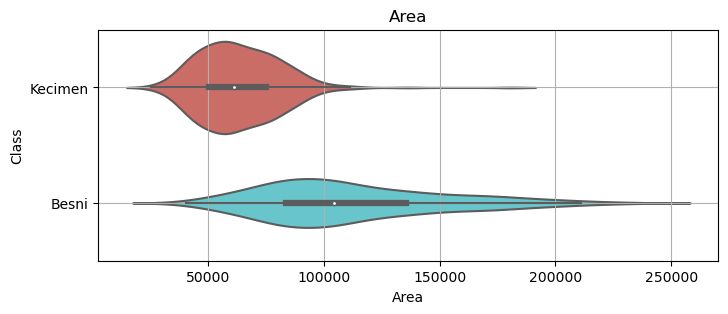

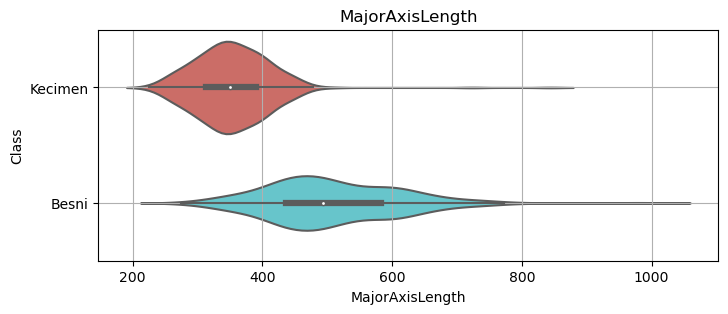

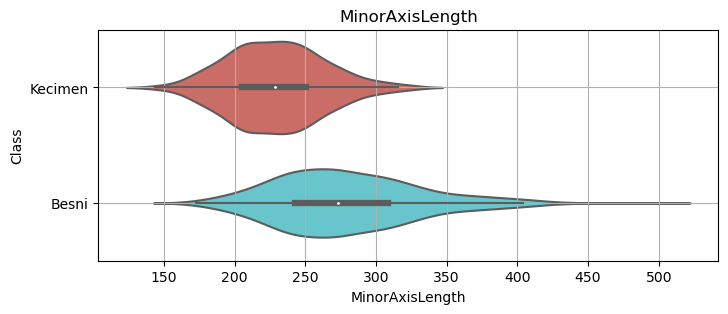

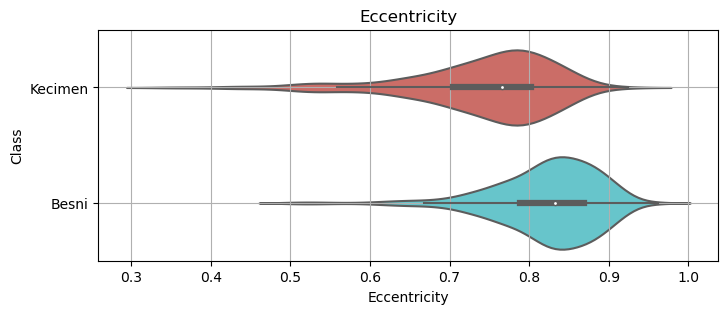

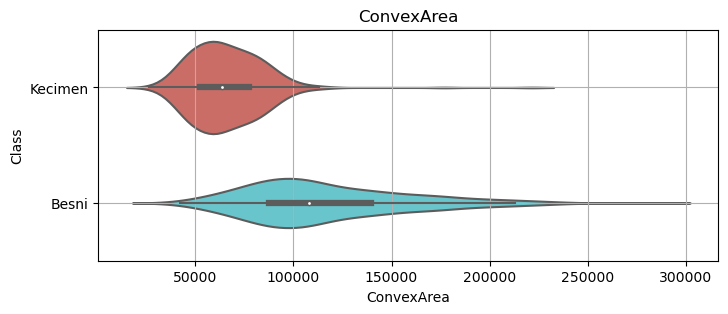

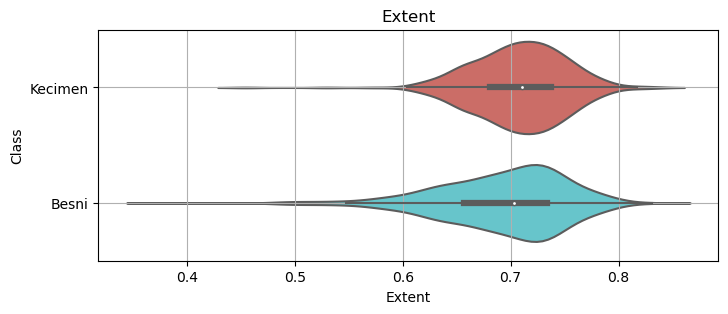

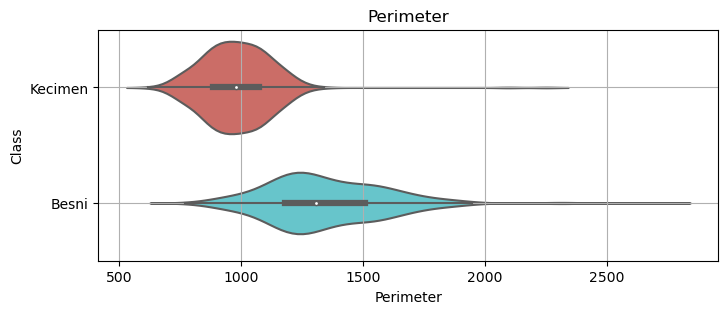

In [13]:
# plot distributions split by class for each feature
for f in featuresNumData:
    plt.figure(figsize=(8,3))
    sns.violinplot(data=df, y='Class', x=f, palette='hls')
    plt.grid()
    plt.title(f)
    plt.show()

<a id='PCA'></a>
# Dimensionality Reduction - PCA

In [14]:
# standardization of features
df4PCASTD = StandardScaler().fit_transform(df[featuresNumData])

# running Principle Component Analysis(PCA)
pcModel = PCA(n_components=3)
pc = pcModel.fit_transform(df4PCASTD)

# append PCA components to original data frame
df['pc_1'] = pc[:,0]
df['pc_2'] = pc[:,1]
df['pc_3'] = pc[:,2]

In [15]:
# interactive 3D plot - colored by class; size ~ area
figure = px.scatter_3d(df, x='pc_1', y='pc_2', z='pc_3',
                    color=df.Class.astype(str),
                    size=df.Area,
                    hover_data=featuresNumData,
                    opacity=0.35)

figure.update_layout(title='Visualization(PCA dimension reduction)')
figure.show()

## <p>Logistic Regression</p>

In [16]:
# Test/Train Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# create a pipeline object
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

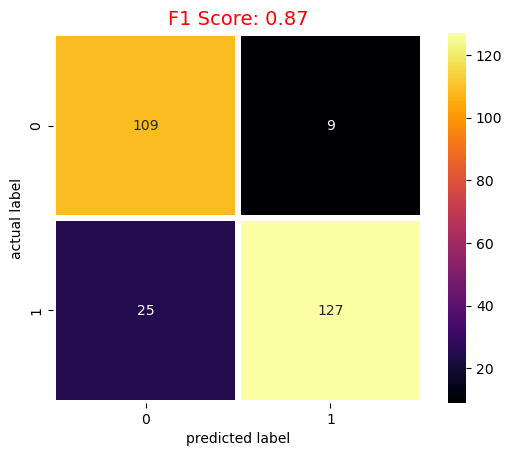

In [18]:
# f1 score
f1_score_logr = f1_score(y_test, y_pred, average='micro')

# confusion matrix
cm_logr = confusion_matrix(y_test, y_pred)

# showing the heatmap
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='inferno',color="#cd1076")

# labels, title and ticks
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_logr:.2f}',size=14,color='red')
plt.show()

In [19]:
# Linear Regression Accuracy score
linearRegressionAccuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy Score : {linearRegressionAccuracy}")


Accuracy Score : 0.8740740740740741


## <p>K-Nearest Neighbour(KNN) </p>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# apply the knn classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

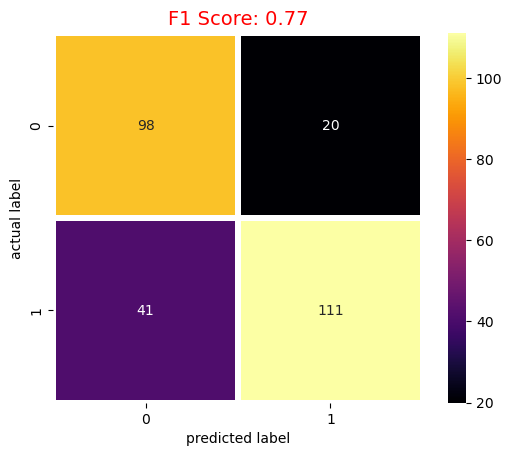

In [21]:
# f1 score
f1_score_knn = f1_score(y_test,y_pred, average='micro')

# confusion matrix
cm_knn = confusion_matrix(y_test,y_pred)

# showing the heatmap
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='inferno', color="#cd1076")

# labels, title and ticks
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_knn:.2f}',size=14,color='red')
plt.show()

In [22]:
# Accuracy score
knnAccuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy Score : {knnAccuracy}")


Accuracy Score : 0.774074074074074


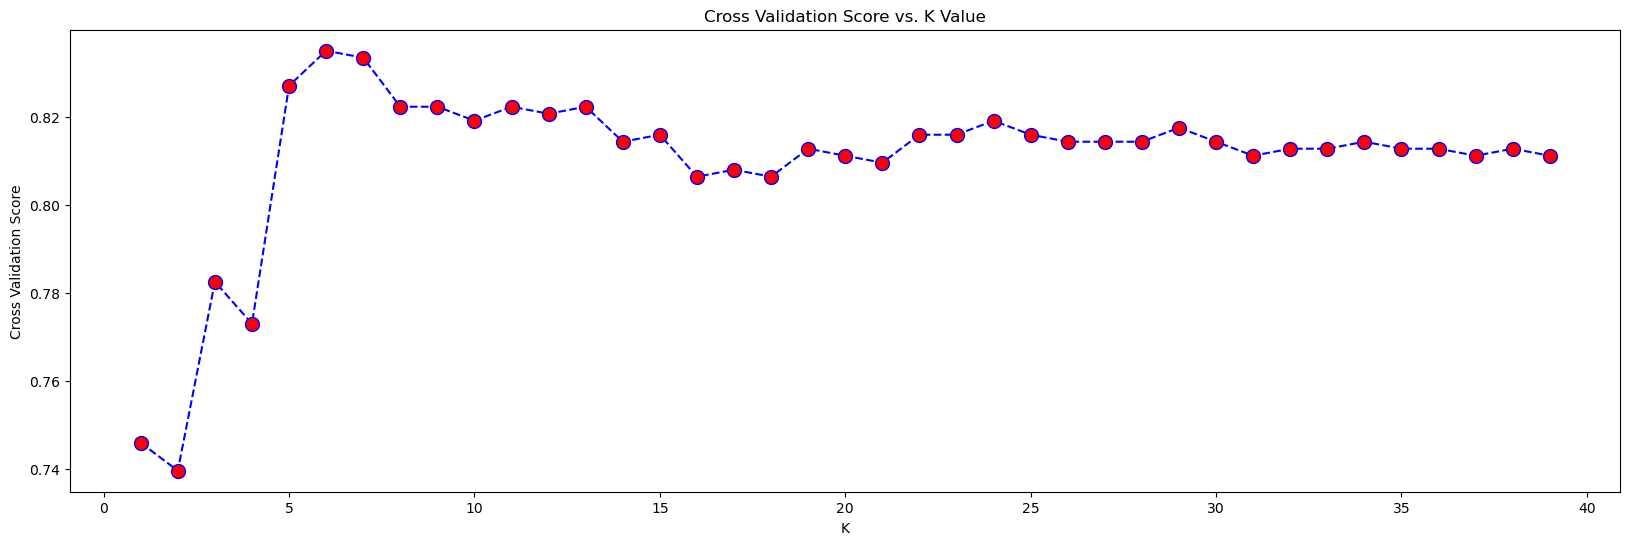

In [23]:
# Optimal k value
errorRate = []

# Testing range for the values of k
k_values = range(1, 40)

#testing in the range
for i in range(1,40):
    knn_test = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski')
    # evaluate the model using cross-validation
    cv_scores = cross_val_score(knn_test, X_train, y_train, cv=5)
    errorRate.append(cv_scores.mean())

# value of k with the highest mean score
plt.figure(figsize=(20,6))
plt.plot(range(1,40),errorRate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Cross Validation Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Cross Validation Score')
plt.show()

In [24]:
# printing value of k with the highest mean score
bestKValue = k_values[errorRate.index(max(errorRate))]

print("\nBest value of k: ", bestKValue)


Best value of k:  6


In [25]:
# with k = 6
knn6 = KNeighborsClassifier(n_neighbors = 6)
knn6.fit(X_train, y_train)

y_pred = knn6.predict(X_test)

f1_score_knn = f1_score(y_test,y_pred, average='micro')

# Accuracy score
knn6Accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {knn6Accuracy}")


Accuracy Score is 0.8333333333333334


# Support Vector Machine

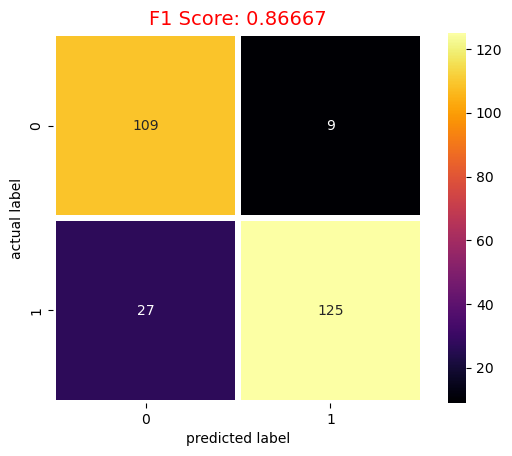

In [26]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', probability=True)
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

# f1 score
f1_score_svc = f1_score(y_test,y_pred, average='micro')

# Confusion Matrix
cm_svc = confusion_matrix(y_test,y_pred)

# showing the heatmap
sns.heatmap(cm_svc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='inferno', color="#cd1076")

# labels, title and ticks
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_svc:.5f}',size=14,color='red')
plt.show()

In [27]:
# Accuracy score
svmAccuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {svmAccuracy}")


Accuracy Score is 0.8666666666666667


## Naive Bayes

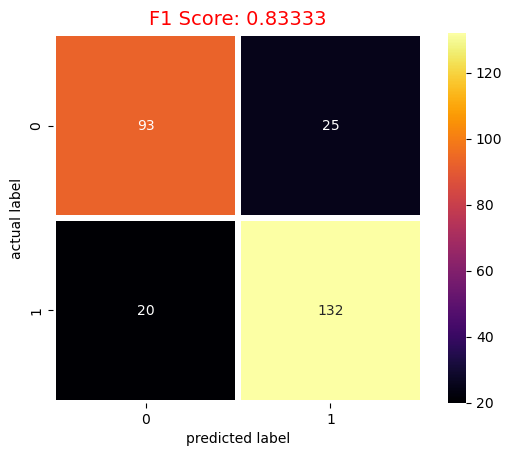

In [28]:
from sklearn.naive_bayes import MultinomialNB

# Applying Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

y_pred = mnb.predict(X_test)

# F1 score
f1_score_mnb = f1_score(y_test,y_pred, average='micro')

# Confusion Matrix
cm_mnb = confusion_matrix(y_test,y_pred)

# showing the heatmap
sns.heatmap(cm_mnb, annot=True,fmt=".0f",linewidths=3,square=True, cmap='inferno', color="#cd1076")

# labels, title and ticks
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_mnb:.5f}',size=14,color='red')
plt.show()

In [29]:
# Accuracy score
naiveBayesAccuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {naiveBayesAccuracy}")


Accuracy Score is 0.8333333333333334


### Decision Tree

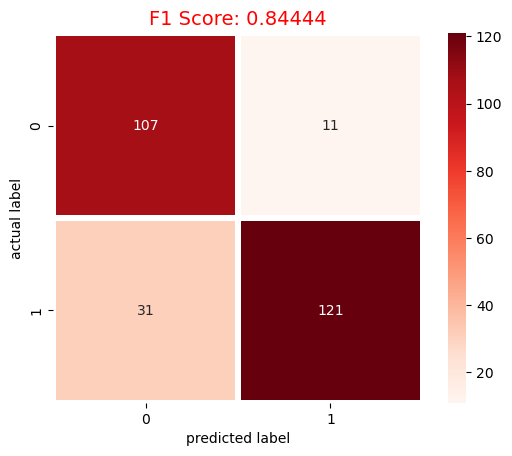

In [30]:
from sklearn.tree import DecisionTreeClassifier

# applying decision tree
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

# F1 score
f1_score_dt = f1_score(y_test,y_pred, average='micro')

# Confusion Matrix
cm_dt = confusion_matrix(y_test,y_pred)

# displaying the heatmap
sns.heatmap(cm_dt, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")

# labels, title and ticks
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_dt:.5f}',size=14,color='red')
plt.show()

In [31]:
# Accuracy score
decisionTreeAccuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score is {decisionTreeAccuracy}")


Accuracy Score is 0.8444444444444444


<a id='RF'></a>
# Random Forest Model

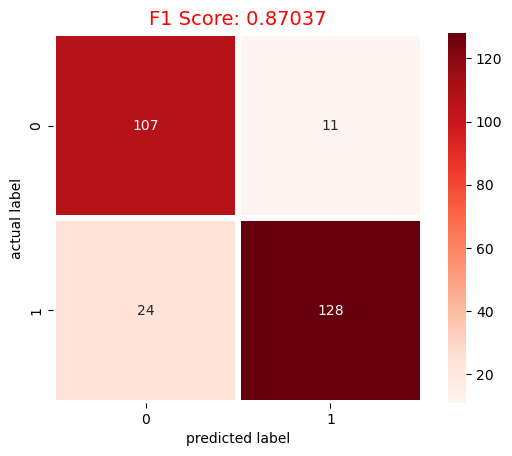

In [33]:
# define random forest model
from sklearn.ensemble import RandomForestClassifier

# applying random forest classifier.
rfc = RandomForestClassifier(n_estimators = 10, max_depth=8, random_state = 111, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


# F1 score
f1_score_rfc = f1_score(y_test,y_pred, average='micro')

#Confusion Matrix.
cm_rfc = confusion_matrix(y_test,y_pred)

# displaying the heatmap
sns.heatmap(cm_rfc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Reds', color="#cd1076")

# labels, title and ticks
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'F1 Score: {f1_score_rfc:.5f}',size=14,color='red')
plt.show()


In [35]:
# storing the cross validation scores in a variable
scores = cross_val_score(rfc, X_train, y_train, cv=5, scoring='roc_auc')

#printing the score.
print(scores)

[0.90353535 0.90012626 0.92133838 0.92448773 0.92613205]


In [36]:
# Area unde the ROC Curve (AUC)

# printing the mean of the scores.
print('Mean (CV AUC) : ', np.mean(scores))

#printing the standard deviation of the scores.
print('Standard Deviation(CV AUC) : ', np.std(scores))

Mean (CV AUC) :  0.9151239564887426
Standard Deviation(CV AUC) :  0.011015480698164824


In [43]:
# fit model
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=10,
                       random_state=111)

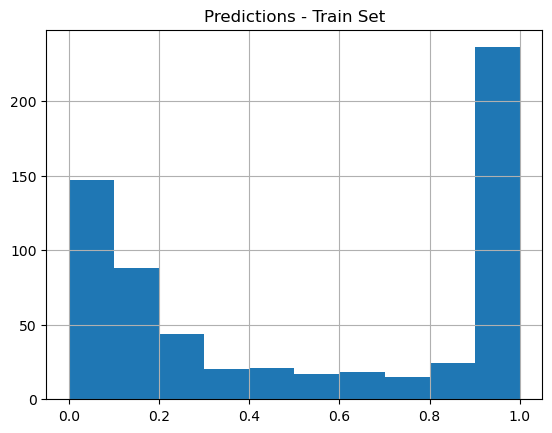

In [45]:
# predict on train set
yTrainPred = pd.DataFrame(rfc.predict_proba(X_train), columns=['p0','p1'])
yTrainPred_p = yTrainPred.p0

# Plotting the data.
plt.hist(yTrainPred_p)
plt.title('Predictions - Train Set')
plt.grid()
plt.show()


In [47]:
# convert target to 0/1 (categorical)
yTrain01 = pd.factorize(y_train)

yTrain01 = yTrain01[0]

In [48]:
# ROC Curve and Area under the ROC Curve.
fpr, tpr, threshold = metrics.roc_curve(yTrain01, yTrainPred_p)

# uses a trapeziodal rule to calculate the area under the ROC curve.
aucTrain = metrics.auc(fpr,tpr)

# printing the data.
print("Area under the ROC curve for 'Train':", aucTrain)

Area under the ROC curve for 'Train': 0.9914136411417482


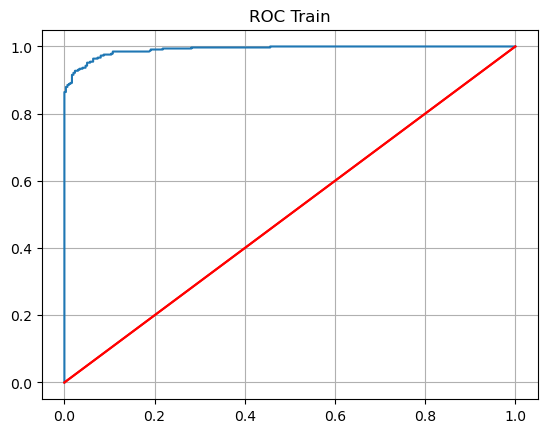

In [49]:
# ROC Curve.
plt.plot(fpr, tpr)
plt.plot([(0,0),(1,1)], c='red')

plt.title('ROC (Train)')

plt.grid()
plt.show()

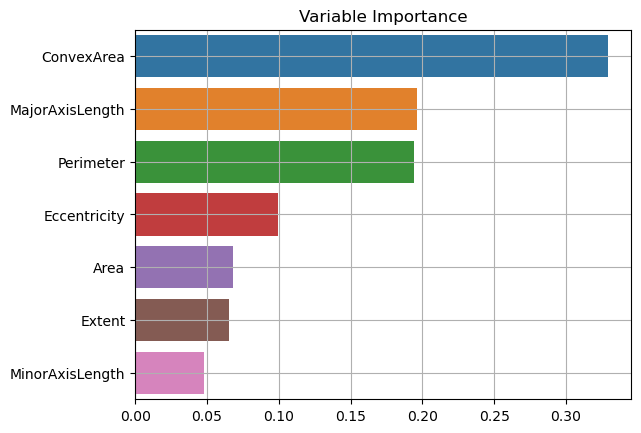

In [50]:
# Variable importance (features)
feature_imp = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot the above data
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to the graph
plt.title('Variable Importance')
plt.grid()
plt.show()

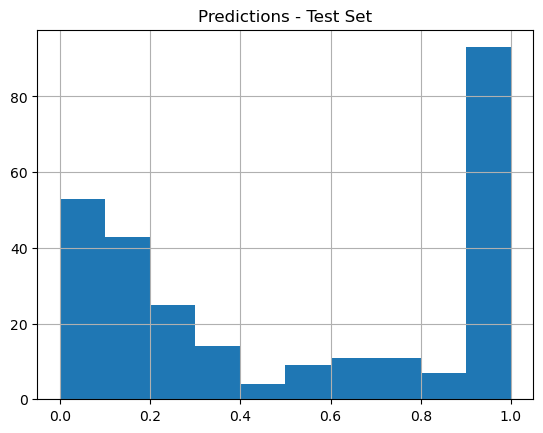

In [51]:
# predict on test set
yTestPred = pd.DataFrame(rfc.predict_proba(X_test), columns=['p0','p1'])
yTestPred_p = yTestPred.p0

# PLot the data
plt.hist(yTestPred_p)
plt.title('Predictions - Test Set')
plt.grid()
plt.show()

In [52]:
# convert target to 0/1
y_test_01 = pd.factorize(y_test)
y_test_01 = y_test_01[0]

In [53]:
# ROC Curve and Area under the ROC Curve.
fpr, tpr, threshold = metrics.roc_curve(y_test_01, yTestPred_p)

# uses a trapeziodal rule to calculate the area under the ROC curve.
aucTest = metrics.auc(fpr,tpr)

# printing the data.
print("Area under the ROC Curve for 'Test'", aucTest)

Area under the ROC Curve for 'Test' 0.9437165477252453


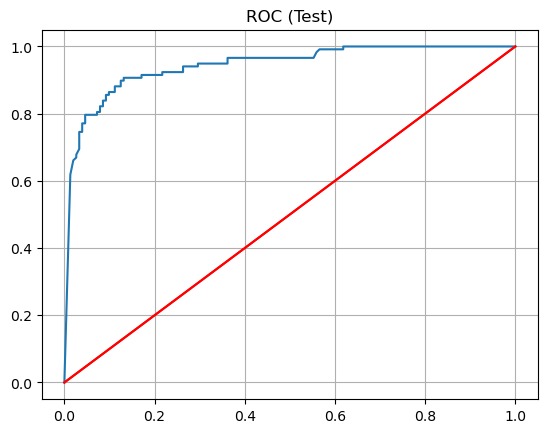

In [54]:
# plot ROC Curve
plt.plot(fpr, tpr)
plt.plot([(0,0),(1,1)], c='red')

plt.title('ROC (Test)')

plt.grid()
plt.show()

# Evaluate Models

## Cross Val Score

In [56]:
# Cross Validation Score.
print(cross_val_score(rfc, x, y, cv=5))

[0.88888889 0.88888889 0.88333333 0.85555556 0.83888889]


In [58]:
# Mean(Accuracies)
accuracies = cross_val_score(rfc, X_train, y_train, cv = 5)


#printing the Mean and standard deviation
print(f'Mean (Accuracies) : {accuracies.mean()*100}')
print('Standard Deviation %age',accuracies.std()*100)

Mean (Accuracies) : 86.34920634920634
Standard Deviation %age 2.093794596551258


In [59]:
# Putting up F1 Score, Mean, Standard deviation all together, and inferencing with cross validation score.
print(f'F1 Score (Random Forest) : {f1_score_rfc*100:.2f}')
print(f'Mean (Accuracies) : {accuracies.mean()*100:}')
print(f'Standard Deviation %age : {accuracies.std()*100:.2f}')

F1 Score (Random Forest) : 87.04
Mean (Accuracies) : 86.34920634920634
Standard Deviation %age : 2.09


There is no overfitting as they are very close to each other, which indicate our model is good.


## Comparision of Confusion Matrices

In [61]:
# Confusion Matrices
print('\033[1m' + '\033[96m' + '-CONFUSION MATRICES-\n' + '\033[0m'+'\033[0m')

print('\033[1m' + f'Logistic Regression' +'\033[0m' + f'\n{cm_logr}' + f' \n F1 Score: {f1_score_logr:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'KNN-K Nearest Neighbors' +'\033[0m' + f'\n{cm_knn}' + f' \n F1 Score: {f1_score_knn:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'SVC-Support Vector Classifier' +'\033[0m' + f'\n{cm_svc}' + f' \n F1 Score: {f1_score_svc:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Multinomial Naive Bayes' +'\033[0m' + f'\n{cm_mnb}' + f' \n F1 Score: {f1_score_mnb:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Decision Tree Classifier' +'\033[0m' + f'\n{cm_dt}' + f' \n F1 Score: {f1_score_dt:.2f}\n\n' + '\033[0m'  )
print('\033[1m' + f'Random Forest Classifier' +'\033[0m' + f'\n{cm_rfc}' + f' \n F1 Score: {f1_score_rfc:.2f}\n\n' + '\033[0m'  )

-CONFUSION MATRICES-

Logistic Regression
[[109   9]
 [ 25 127]] 
 F1 Score: 0.87


KNN-K Nearest Neighbors
[[ 98  20]
 [ 41 111]] 
 F1 Score: 0.83


SVC-Support Vector Classifier
[[109   9]
 [ 27 125]] 
 F1 Score: 0.87


Multinomial Naive Bayes
[[ 93  25]
 [ 20 132]] 
 F1 Score: 0.83


Decision Tree Classifier
[[107  11]
 [ 31 121]] 
 F1 Score: 0.84


Random Forest Classifier
[[107  11]
 [ 24 128]] 
 F1 Score: 0.87




## Comparision of F1 Scores

In [62]:
# Putting all the F1 Scores in one table.
titlesOfClassifiers = pd.DataFrame(['Logistic Regression','KNN - K Nearest Neighbors','SVC - Support Vector Classifier','Multinomial Naive Bayes','Decision Tree Classifier','Random Forest Classifier'])

allF1Scores = pd.DataFrame([f1_score_logr,f1_score_knn,f1_score_svc,f1_score_mnb,f1_score_dt,f1_score_rfc])

f1_score_table = pd.concat([titlesOfClassifiers,allF1Scores],axis=1)
f1_score_table.columns=['ALGORITHM','F1 SCORE',]

f1_score_table.sort_values(by='F1 SCORE',ascending=True)

,ALGORITHM,F1 SCORE
1,KNN - K Nearest Neighbors,0.833333
3,Multinomial Naive Bayes,0.833333
4,Decision Tree Classifier,0.844444
2,SVC - Support Vector Classifier,0.866667
5,Random Forest Classifier,0.870370
0,Logistic Regression,0.874074


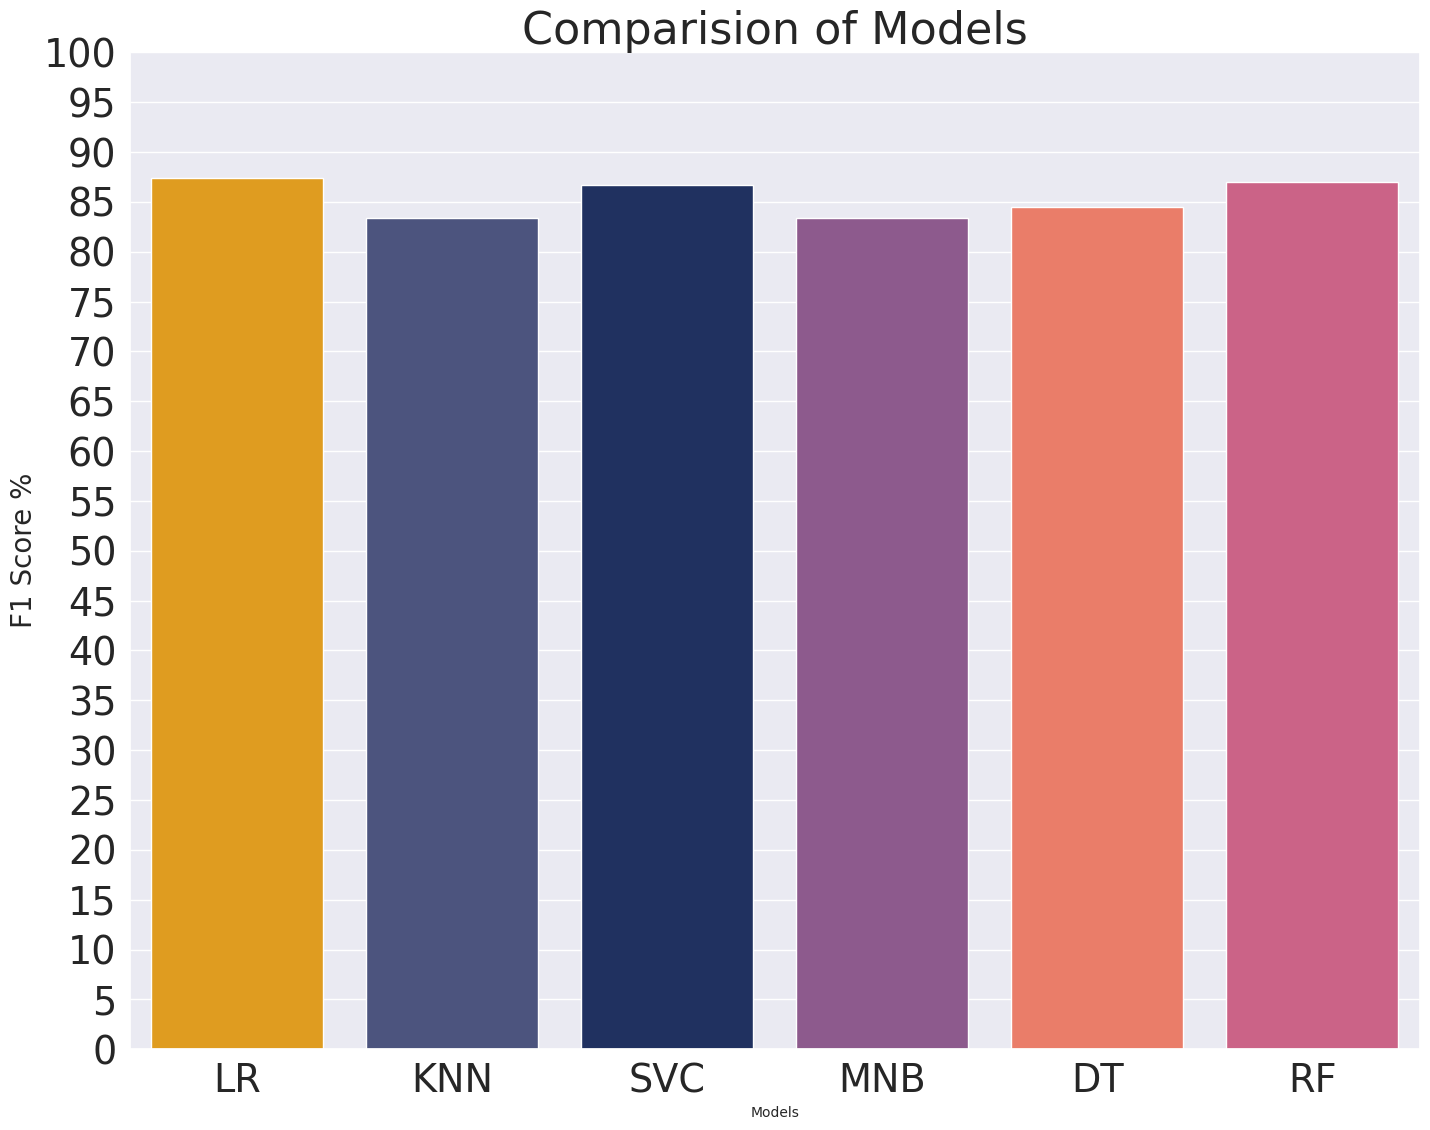

In [65]:
# F1 Scores Comparison on a Bar Chart
f1ScoresForBarChart = {'LR': f1_score_logr*100 , 'KNN': f1_score_knn*100, 'SVC': f1_score_svc*100, 'MNB': f1_score_mnb*100, 'DT': f1_score_dt*100,'RF': f1_score_rfc*100}

colors = ['#ffa600', "#444e86", "#152c6b",  "#955196", "#ff6e54","#dd5182"]
sns.set_style("darkgrid")

sns.set(font_scale = 2.5)
plt.figure(figsize=(15,12))

sns.barplot(x=list(f1ScoresForBarChart.keys()), y=list(f1ScoresForBarChart.values()), palette=colors)

plt.yticks(np.arange(0,101,5))
plt.title('Comparision of Models', fontsize=32)
plt.ylabel("F1 Score %", fontsize=20)
plt.xlabel("Models", fontsize=10)
plt.tight_layout()
plt.show()